# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [30]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

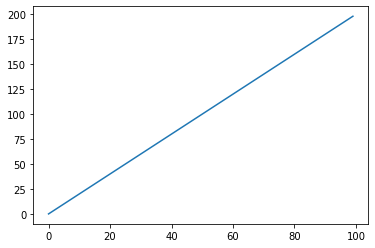

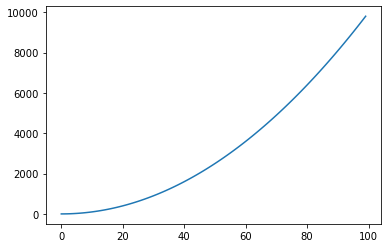

In [3]:
# Method 1
plt.plot(x,y)
plt.show()
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

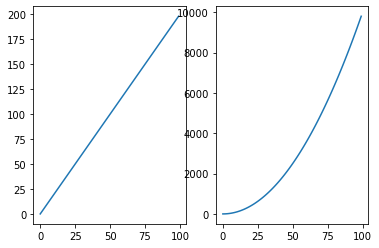

In [4]:
# Method 2
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(x, y)
ax2.plot(x, z)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

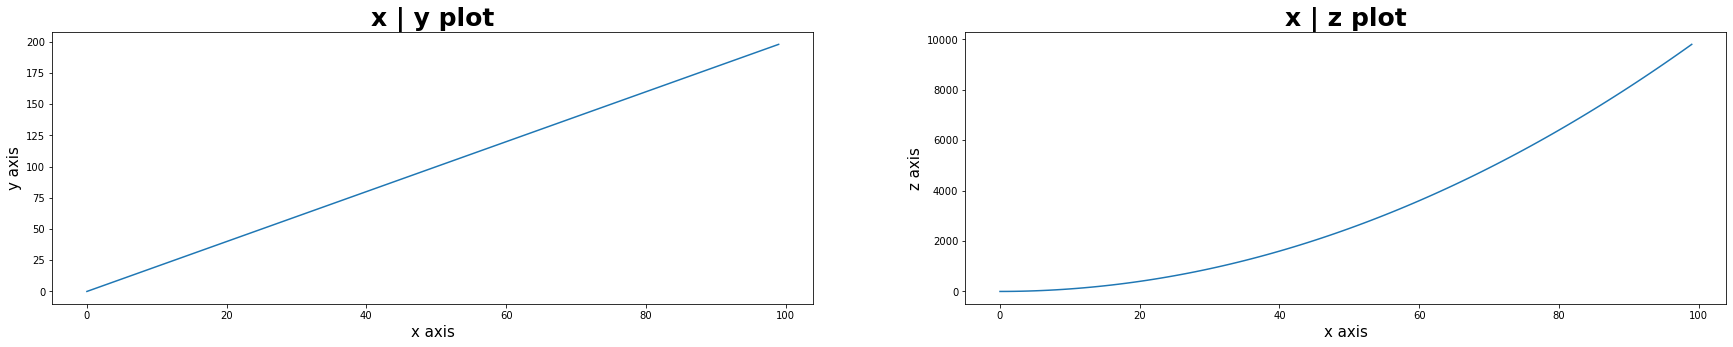

In [9]:
# your code here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(30,5))
ax1.plot(x, y)
ax1.set_ylabel('y axis',fontsize=15)
ax1.set_xlabel('x axis',fontsize=15)
ax2.plot(x, z)
ax2.set_ylabel('z axis',fontsize=15)
ax2.set_xlabel('x axis',fontsize=15)
ax1.set_title('x | y plot',fontsize=25,fontweight="bold")
ax2.set_title('x | z plot',fontsize=25,fontweight="bold")
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

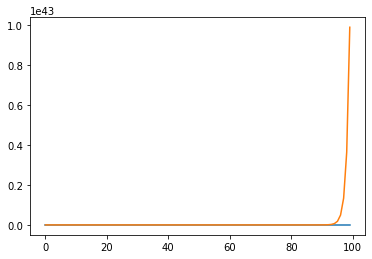

In [11]:
# your code here
x = np.arange(0,100)
y = x**2
e = 2.71828
z = e**x

plt.plot(x,y)
plt.plot(x,z)
plt.show()


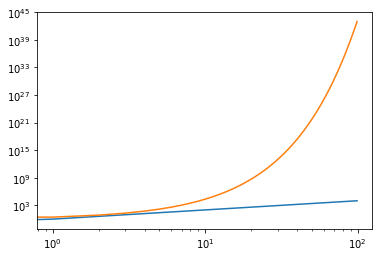

In [12]:
plt.plot(x,y)
plt.plot(x,z)
plt.xscale('log')
plt.yscale('log')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

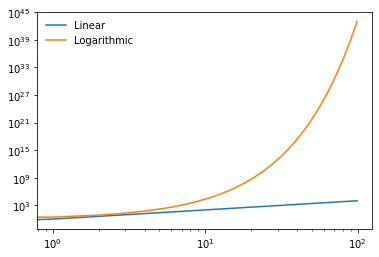

In [13]:
# your code here
fig, ax = plt.subplots()
ax.plot(x, y, label='Linear')
ax.plot(x, z, label='Logarithmic')
ax.set_xscale('log')
ax.set_yscale('log')
leg = ax.legend();
ax.legend(loc='upper left', frameon=False)
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [14]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

,Months_encoded,Steps
0,1,10366.0
1,2,9235.0
2,3,11122.0
3,4,13846.5
4,5,11998.0
5,6,12935.5
6,7,10644.0
7,8,12213.0
8,9,9343.0
9,10,7865.0


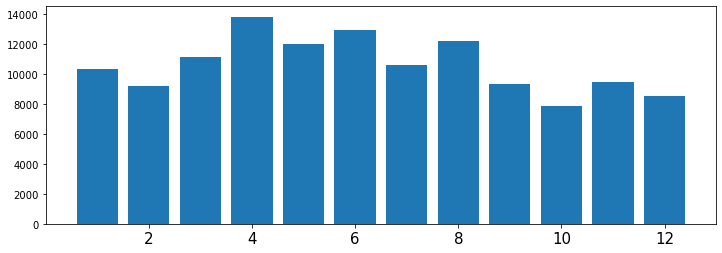

,Work_or_Weekend,Steps
0,0,9998.0
1,1,10445.5


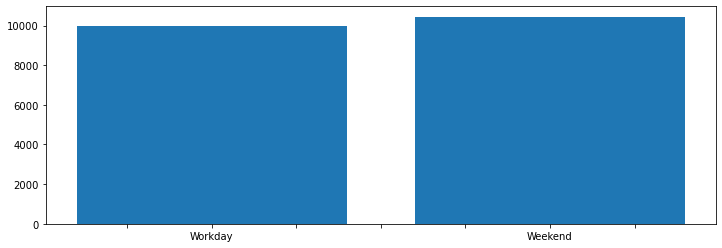

In [19]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_month = fitbit.groupby('Months_encoded').agg({'Steps':'median'}).reset_index()
display(steps_month)
plt.figure(figsize = (12,4))
plt.bar(steps_month['Months_encoded'],steps_month['Steps'])
plt.xticks(fontsize=15)
plt.show()

fig.savefig("figures/Months_steps.png")

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
steps_week = fitbit.groupby('Work_or_Weekend').agg({'Steps':'median'}).reset_index()
display(steps_week)
plt.figure(figsize = (12,4))
plt.bar(steps_week['Work_or_Weekend'],steps_week['Steps'])
plt.xticks([-0.25,0,0.25,0.5,0.75,1,1.25],["","Workday","","","",'Weekend',""])
plt.show()

fig.savefig("figures/Work_Weekend_steps.png")


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

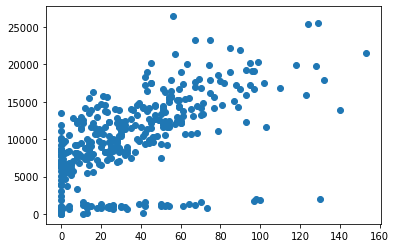

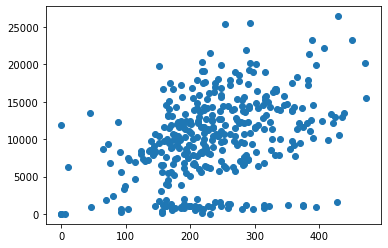

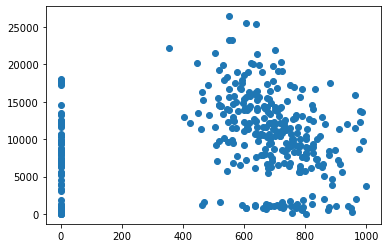

In [20]:
# your code here
features =['Minutes Very Active', 'Minutes Lightly Active','Minutes Sedentary']

for i in features:
    plt.scatter(fitbit[i],fitbit['Steps'])
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [21]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [22]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [23]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes('float64','int64')

,Survived,Age,Fare
0,0.0,22.000000,7.2500
1,1.0,38.000000,71.2833
2,1.0,26.000000,7.9250
3,1.0,35.000000,53.1000
4,0.0,35.000000,8.0500
...,...,...,...
1304,NaN,29.513190,8.0500
1305,NaN,39.000000,108.9000
1306,NaN,38.500000,7.2500
1307,NaN,29.513190,8.0500


In [24]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [25]:
# your code here
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
plt.figure(figsize = (12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

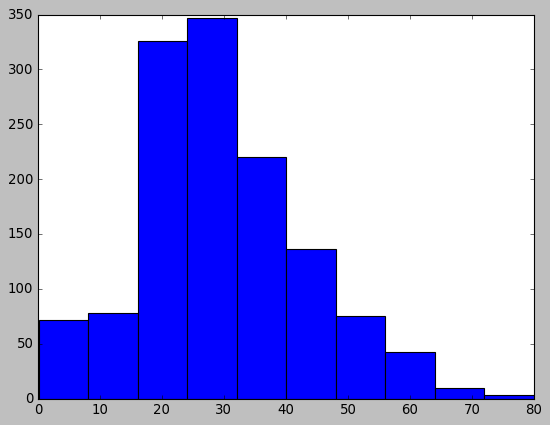

In [26]:
# your code here
plt.hist(titanic['Age'])
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

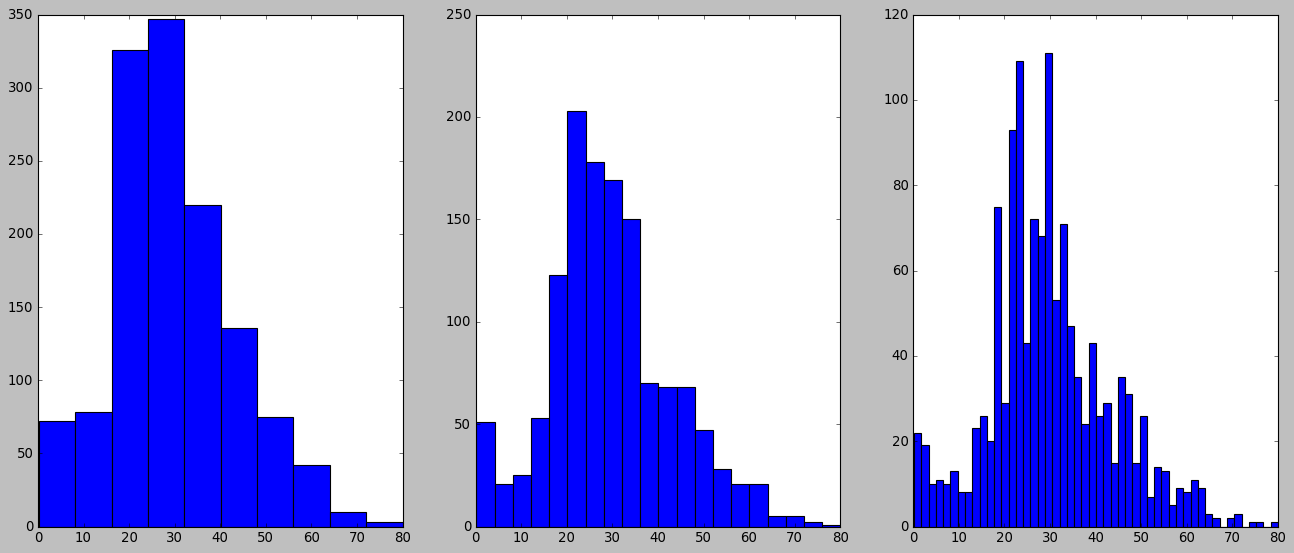

In [28]:
# your code here
fig, [bins_10, bins_20, bins_30] = plt.subplots(1,3, figsize=(20,8))

bins_10.hist(titanic['Age'],10)
bins_20.hist(titanic['Age'],20)
bins_30.hist(titanic['Age'],50)

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here

If we have more bins, we can see a more distribuited values in the plot.
"""

#### Use seaborn to show the distribution of column `Age`.

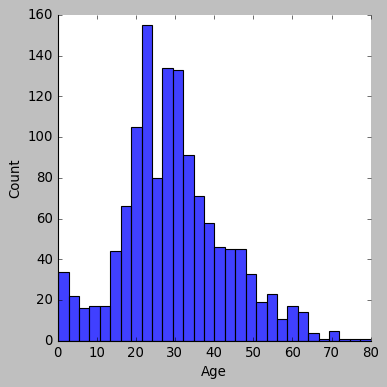

In [31]:
# your code here
sns.displot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

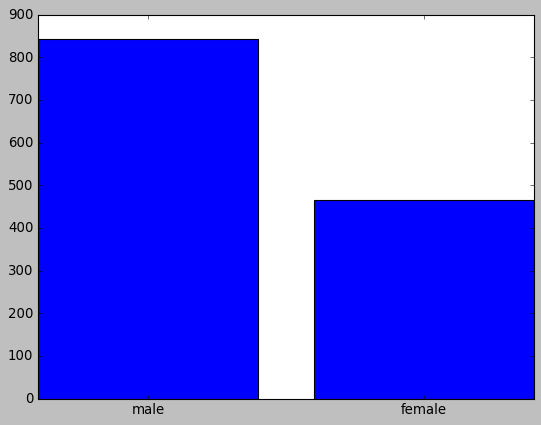

In [32]:
# Method 1 - matplotlib
# your code here
gender = titanic['Gender'].unique()
frequency = titanic['Gender'].value_counts()

plt.bar(gender,frequency)
plt.show()

<AxesSubplot:ylabel='Gender'>

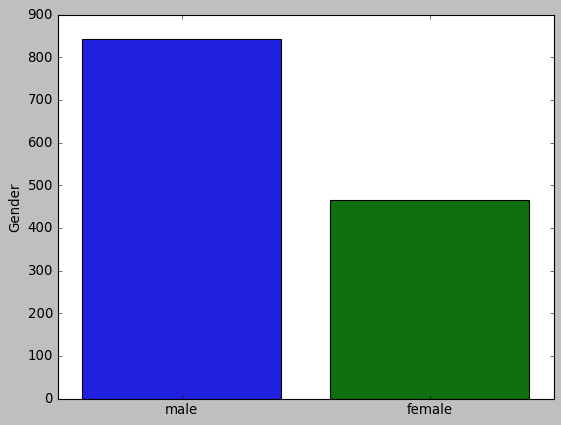

In [33]:
# Method 2 - seaborn
# your code here
sns.barplot(x=gender,y=frequency)

#### Use the right plot to visualize the column `Pclass`.

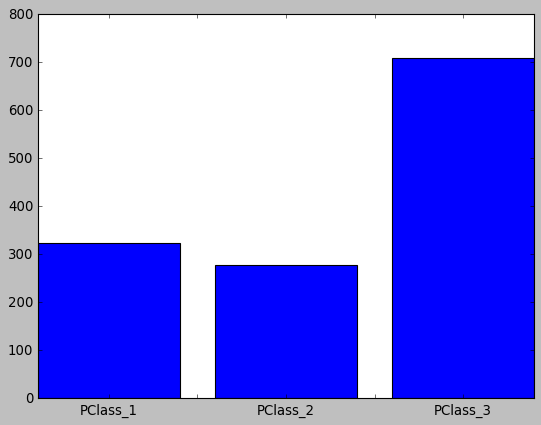

In [34]:
# your code here
pclass = titanic['Pclass'].unique()
freq_class = titanic['Pclass'].value_counts()
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5],["","PClass_1","","PClass_2","",'PClass_3',""])
plt.bar(pclass,freq_class)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

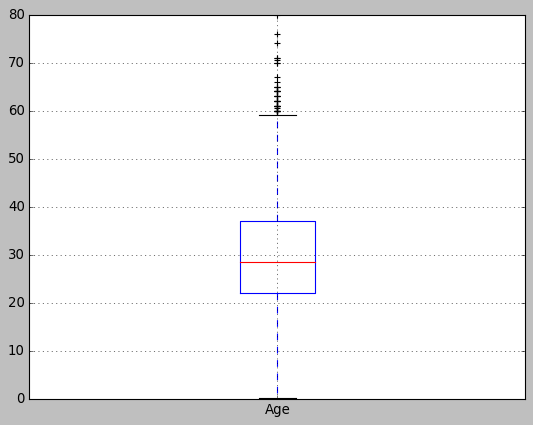

In [38]:
# your code here
titanic.boxplot(column='Age')

In [ ]:
"""
your comments here

To show all, I think the best option is boxplot.
With this function we can see the passenger ages per quartiles.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

Thanks to quartiles, we can say:
The median would be around 29.
Quartile_1 from 0-21 years old.
Quartile_2 from 21-37 years old.
Quartile_3 from 37-59 years old.
We have some people older than 59 as we can observe in the plot.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

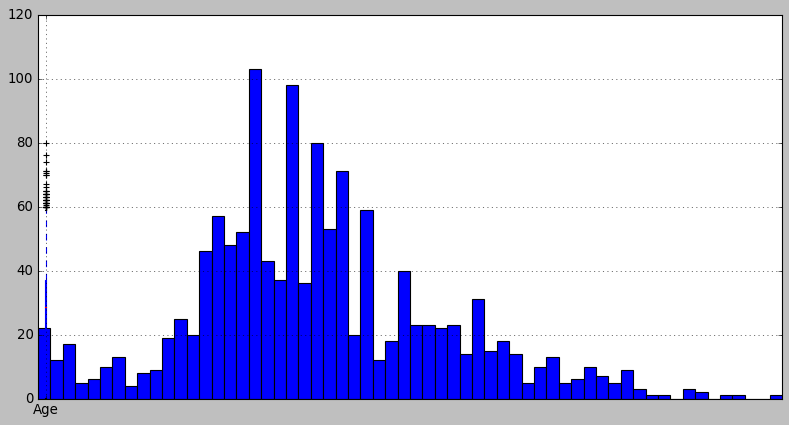

In [41]:
# your code here
plt.figure(figsize =(12,6))
titanic.boxplot(column='Age')
plt.hist(titanic['Age'],60,orientation='vertical', color='blue')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

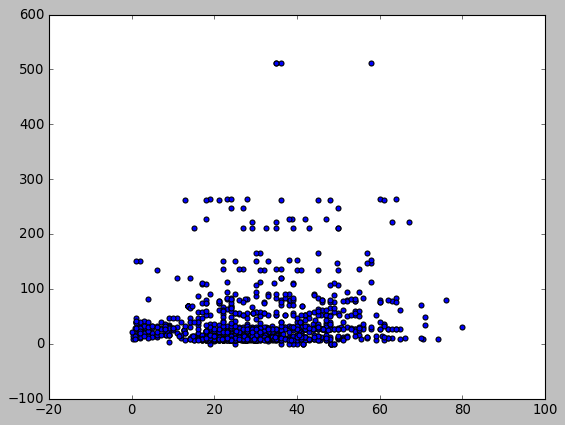

In [42]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['Age'],titanic['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

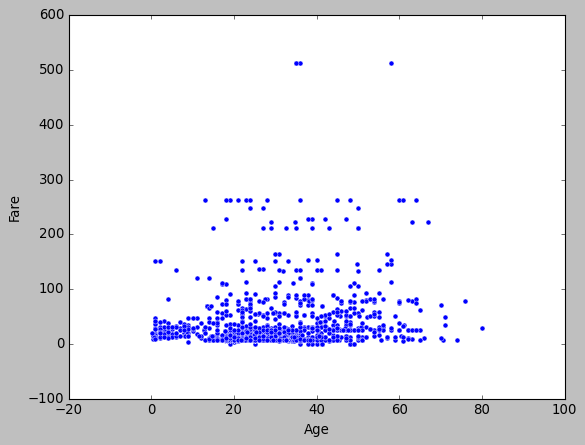

In [43]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data = titanic, x = 'Age', y = 'Fare')

#### Plot the correlation matrix using seaborn.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


<AxesSubplot:>

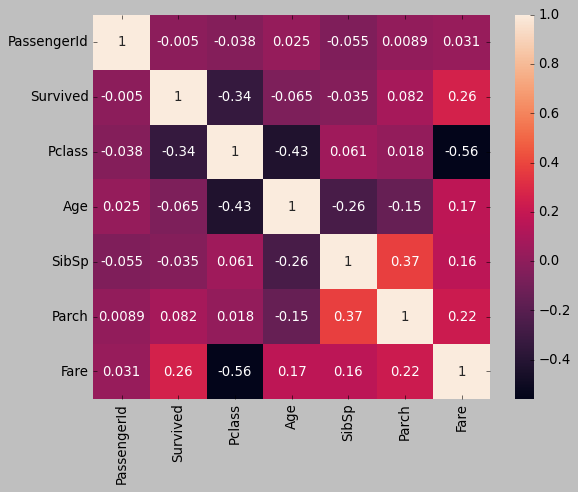

In [44]:
# your code here
display(titanic.corr())
sns.heatmap(titanic.corr(),annot=True, xticklabels = titanic.corr().columns,yticklabels = titanic.corr().columns)


#### What are the most correlated features?

In [ ]:
"""
your comments here
Parch | SibSp
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

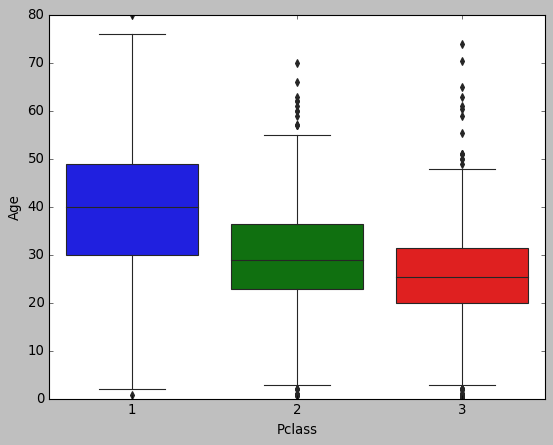

In [45]:
# your code here
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

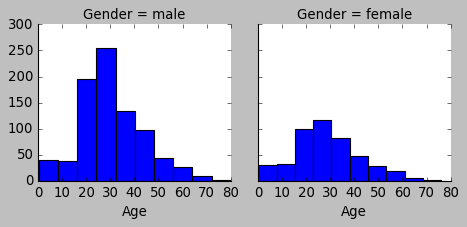

In [46]:
# your code here
titanic_gen = sns.FacetGrid(titanic, col = "Gender")
titanic_gen.map(plt.hist, "Age")
plt.show()